# Machine Learning and Data Analysis
----------------------------------------------
### *Session 2*


```
3rd October, 2023
Anna Pallarès López
Computer Engineering Master's

```



### 1. Generate data

In [ ]:
# import libraries

import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt

In [ ]:
# random generator (used to obtain the same random value)

np.random.seed(13)

In [ ]:
# define a funtion

def oracle(x):
  #return x**2
  # return np.abs(np.abs(x-.4)-.2)+x/2-.1 # piecewise
  return np.sinc(3*x) # exponential function
  # the idea is that we can put whatever we want

In [ ]:
# define the boundaries of the funcion

n = 15 # number of points - choice
sigma = .1 # noise - choice

x = np.random.rand(n)
y = oracle(x) + sigma*np.random.rand(n) # + = we add some noise

x = np.asmatrix(x).transpose() # it becomes a matrix
y = np.asmatrix(y).transpose() # it becomes a matrix


no = 1000 # number of samples

xo = np.linspace(0,1,no)
yo = oracle(xo)
xo = np.asmatrix(xo).transpose() # it becomes a matrix
yo = np.asmatrix(yo).transpose() # it becomes a matrix

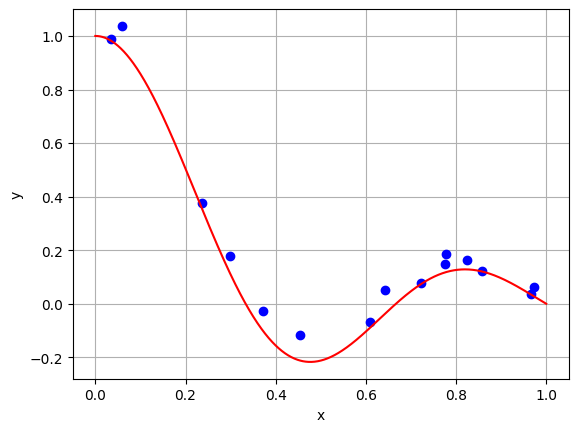

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xo,yo,'r')
ax.set(xlabel='x', ylabel='y')
ax.grid()

### Learn from data. Changing p manually

In [ ]:
# Empirical Risk Minimisation, ERM

p = 2 # degree of the polynom, always p > 0. Our hyperparameter also defines our complexity. THIS IS A PROBLEM
X = nml.ones((n,1)) # n \times (p+1), matrix of size nuber of sambles x number of features
XO = nml.ones((no,1)) # nt \times (p+1)

for i in range(1, p+1):
  X = np.concatenate((X, np.power(x,i)), axis=1)
  XO = np.concatenate((XO, np.power(xo,i)), axis=1)
a = np.linalg.solve(np.matmul(np.transpose(X),X),np.matmul(np.transpose(X),y)) # solving
yp = np.matmul(XO,a) # to get the estimation od the funcion
err = np.mean(np.abs(yp-yo))
err # adding information about the oracle, is not always something that can yeld to better the results!!!

# the noise is parametrized by two parameters: the number of data (as more, the lower noise), or increase the sensibility.
# what we only can do is to improve our model, which only costs computational time


0.12244219924041497

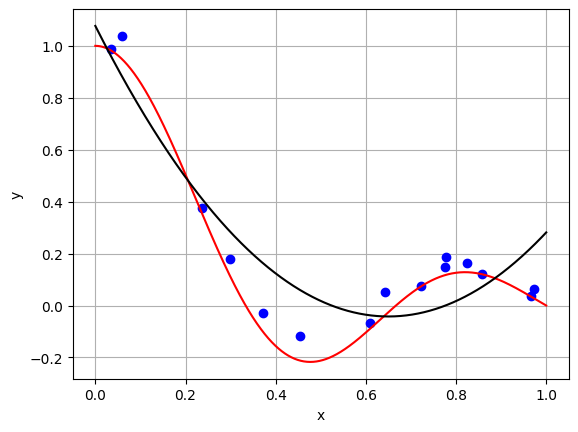

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xo,yo,'r')
ax.plot(xo,yp,'k')
ax.set(xlabel='x', ylabel='y')
ax.grid()

## Split the data

### Not good enough
My results will depend on the quality of the splitting

In [ ]:
# how can we avoid the hyperparameter p
# first we split our data in two parts. We will use libraries: sklearn

from sklearn.model_selection import train_test_split

In [ ]:
xl, xv, yl, yv = train_test_split(x, y, test_size = 0.2) # l = learning / training, v = validation, t = test

In [ ]:
x.shape, xl.shape, xv.shape

((15, 1), (12, 1), (3, 1))

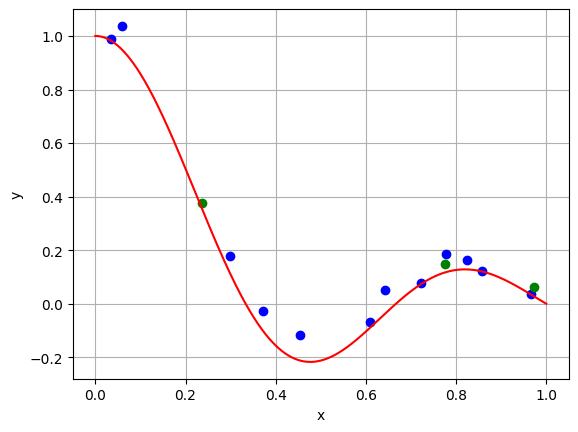

In [ ]:
fig, ax = plt.subplots()
ax.plot(xl,yl,'bo')
ax.plot(xv,yv,'go')
ax.plot(xo,yo,'r')
ax.set(xlabel='x', ylabel='y')
ax.grid()

### Enchace the model

In [ ]:
err_best = np.inf

for p in range(0, 15):
  XL = nml.ones((xl.shape[0],1))
  XV = nml.ones((xv.shape[0],1))
  for i in range(1, p+1):
    XL = np.concatenate((XL, np.power(xl,i)), axis=1)
    XV = np.concatenate((XV, np.power(xv,i)), axis=1)
  a = np.linalg.solve(np.matmul(np.transpose(XL),XL),np.matmul(np.transpose(XL),yl)) # solving
  yp = np.matmul(XV,a) # to get the estimation od the funcion
  err = np.mean(np.abs(yp-yv)) # adding information about the oracle, is not always something that can yeld to better the results!!!
  if (err_best > err):
    err_best = err
    p_best = p


In [ ]:
p = p_best
X = nml.ones((n,1))
XO = nml.ones((no,1))

for i in range(1, p+1):
  X = np.concatenate((X, np.power(x,i)), axis=1)
  XO = np.concatenate((XO, np.power(xo,i)), axis=1)
a = np.linalg.solve(np.matmul(np.transpose(X),X),np.matmul(np.transpose(X),y))
yp = np.matmul(XO,a)
err = np.mean(np.abs(yp-yo))
err


0.05903366915403095

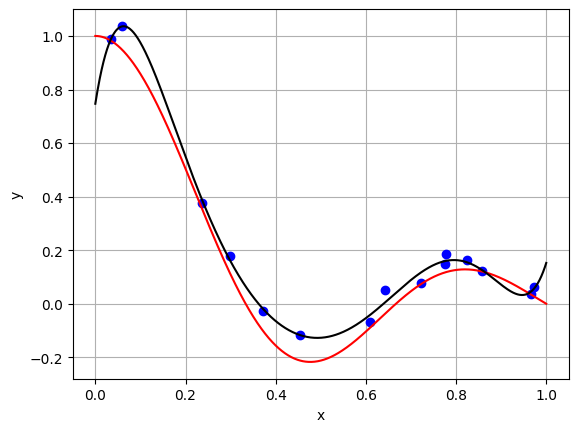

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xo,yo,'r')
ax.plot(xo,yp,'k')
ax.set(xlabel='x', ylabel='y')
ax.grid()

In [ ]:
p_max = 15
n_ns = 30
err_best = np.inf

for p in range(0, 15):
  err = 0
  for ns in range(0,30): # ns = number of samples
    xl, xv, yl, yv = train_test_split(x, y, test_size = 0.2)
    XL = nml.ones((xl.shape[0],1))
    XV = nml.ones((xv.shape[0],1))
    for i in range(1, p+1):
      XL = np.concatenate((XL, np.power(xl,i)), axis=1)
      XV = np.concatenate((XV, np.power(xv,i)), axis=1)
    a = np.linalg.solve(np.matmul(np.transpose(XL),XL),np.matmul(np.transpose(XL),yl)) # solving
    yp = np.matmul(XV,a) # to get the estimation od the funcion
    err += np.mean(np.abs(yp-yv)) # adding information about the oracle, is not always something that can yeld to better the results!!!
  err/= n_ns
  if (err_best > err):
    err_best = err
    p_best = p


In [ ]:
p = p_best
X = nml.ones((n,1))
XO = nml.ones((no,1))

for i in range(1, p+1):
  X = np.concatenate((X, np.power(x,i)), axis=1)
  XO = np.concatenate((XO, np.power(xo,i)), axis=1)
a = np.linalg.solve(np.matmul(np.transpose(X),X),np.matmul(np.transpose(X),y))
yp = np.matmul(XO,a)
err = np.mean(np.abs(yp-yo))
err


0.05239182705044236

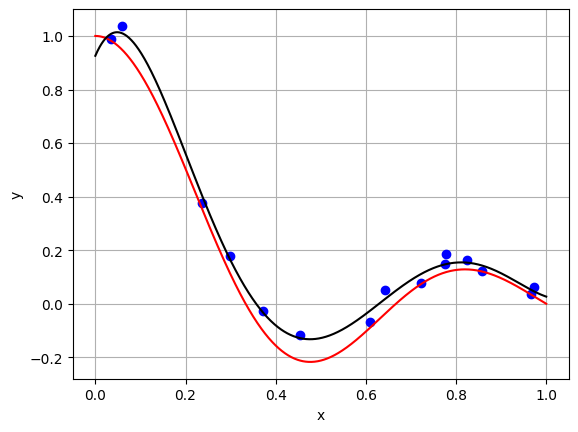

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xo,yo,'r')
ax.plot(xo,yp,'k')
ax.set(xlabel='x', ylabel='y')
ax.grid()

COMENTS

We have a risk as we are restricted by the number of samples.
